 <h1><center>Predicting Asthma Diagnosis As a Screening Tool</center></h1>
 

[<center>Link to GitHub Repository<center>](https://github.com/August-JF-Perez/AugustP_Springboard/tree/main/Projects/Capstone2) 

 - The data source: [<Asthma Disease Dataset>](https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset?resource=download)


# Introduction

- This project aims to build a predictive model in order to screen whether a patient would be diagnosed with asthma.
- The real-world application would be for doctors to more easily determine which patients to focus on, for the more efficient allocation of resources in an already strained healthcare system.
- The final model was trained with 26 features/variables for each patient that encompass categories of demographic details, lifestyle factors, environmental and allergy factors, medical history, clinical measurements, symptoms, and including diagnosis indicator

# Data Source

The dataset used in the models explored was Asthma Disease Dataset from Kaggle

[Link to Kaggle Dataset](https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset?resource=download)

Below is a snapshot of the raw data arranged in a dataframe after importing.

<img src="Figures/rawdata.png">

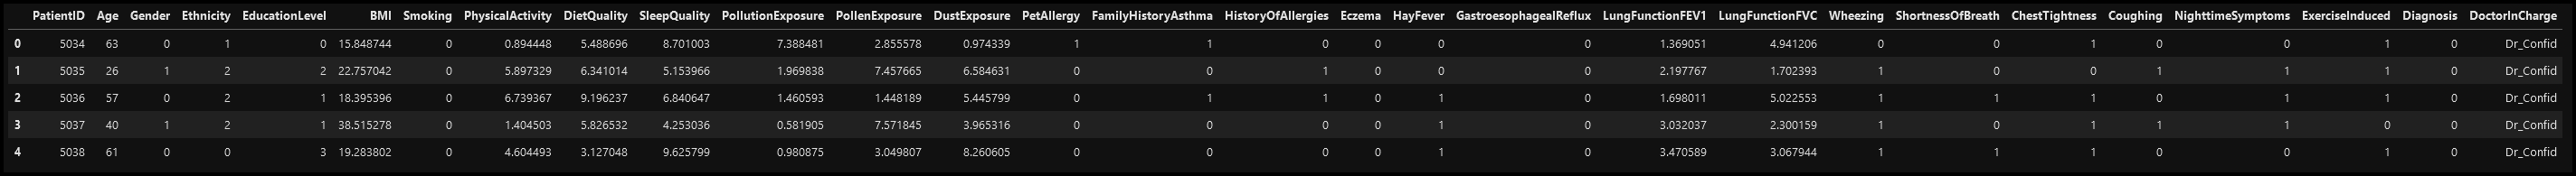

# Data Cleaning

The raw dataset has 48944 entries and 4 columns. To clean the data prior modeling, all the texts in the 'Lines' column were first converted to lower case. Each observation in the 'Lines' column were then tokenized (utlizing the nltk package in python) into a list of words by splitting texts in each observation at blank spaces and new line command(i.e. '\n'). Punctuations, rows with empty tokens, stop words (e.g. the’, ‘is’, ‘are’ etc.) or words consisiting of numbers were then removed from the dataset. The tokenized words were then lemmatized so that all the words can be converted to their basic forms (e.g. 'walk', 'walked', 'walks', 'walking' is converted to the basic for 'walk').

An additional column called Season was also added to the dataset to identify contribution of different characters. Any row with no entry for data['Lines'] after cleaning were then removed from observation. The tokenized words in the observation under 'Lines' column were also rejoined as a string and tokenized again when needed later as some BoW techniques (count vectorizer, tf-idf) requires the input to be string 

Below is a snapshot of the clean dataset.

<img src="Figures/dataset_clean.png">

# EDA: Hightlights

**Lead Actors to Consider** 

-	The tv series has 304 characters in total. Count plot of number of lines for different characters suggests that the plots through the tv series are mainly centered around the main characters we already know (No Surprise!). All the main characters (i.e. Rachel, Ross, Joey, Phoebe, Chandler, Monica) have at least > 6000 lines in the show with Rachel and Ross taking the lead. 

- The barplot of  number of lines per season for different characters shows that all the leading actors had similar level of contribution in each season. Among the supporting actors, Janice and Carol seems to have a significant role from Season 1 - 3. While Mike only appeared in the last season (season 9), his role seemed to have a good contribution in the show based on the number of lines in the last season. This also implies that if the datasize needs to be truncated during ML modeling to save computational time, it is important to shuffle the rows of the dataframe in the preprocessing step so that there are sufficient observations for the key supporting actors to train the model .  

<img src="Figures/count.png">

**Balanced vs Imbalanced Dataset**

-	All the the supporting actors have significantly less number of lines (<500) compared to the main characters. This implies that  multiclass ML modeling may suffer from imbalance in the dataset when number of classes considered is > 6 in the analysis.


**Interactive EDA: Word/Text Density per Observation**

- As accuracy of different word embedding or ML modeling techniques may vary depending on the length of text per observation in the dataset, and interactive EDA was implmented to visualize the word density or the letter density per line for any dersired character or the entire dataset. This allowed to get an idea of the length of the texts per observation in the dataset, and check whether word/letter density distribution for any characters deviate from the genral trend in the dataset. Both word density and letter denisty distribution of the entire dataset were found to be right skewed. The results suggest majority of the observation has ~10 words after removing stopwords, pos etc. The distrubution of different characters can be explored using interactive EDA and seem to follow the general distribution of the dataset. 

<img src="Figures/Density.png">

- CDF plots of word counts  for enitre dataset as well as for particular actors also show that almost all the texts in the dataset have a length less than 20 word counts.

<img src="Figures/CDF.png">

**Interactive EDA: Wordcloud for Different Actors**

- Interactive EDA was also implemented to generate wordcloud that can identify words that have been frequently used by everyone in the show. To find words that are unique to different characters, worldcloud for each characters can also be plotted seperately with an option to filter words frequently used by everyone throughout the show. For example, the plot in the title of this article  shows the world cloud for most common 250 words in the show. Some of the commonly used words are oh, go, know, okay, start, really etc.  When we generate a similar wordcloud using lines for Ross/Monica/Joey and set the filter to 0 (see figure below), the word cloud is dominated by the similar common words. If we filter the first ~3000common words using the slider, the world cloud becomes more unique to the lines of ROSS/Monica/Joey we know from the show [e.g. Mesozoic, aura, fossils etc for Ross, Chandler, Cookie, TV for Joey etc.  after filtering 3000 common words]. Note that name of different characters were excluded from the list of common words during filtering as they may indicate if some other character in the show are more related to them.

<img src="Figures/Wordcloud_filter.png">

# Selelction of Word Embedding Technique

**Methodology**
- To be able to create a representation for words that capture their meanings, semantic relationships and the different types of contexts they are used in,  Word Embedding or numerical representations of texts are implemented prior applying Machine Learning models to the data so that computers may handle them.
<br>

- To select the best word ebbedding technique for this particular dataset, 4 different word embedding schemes (namely: count vectorizer, tf-idf, word2vec with simple averaging and word2vec with tfidf weighted average) were applied to the clean dataset. The logistic regression models were applied to these datasets to evaluate what embedding techniques would work best for this problem.
<br>

- Both count - vectorizer and tf-idf are actually different implementation of  Bag of Words (BOW) algorithm that counts how many times a word appeared in a document. While  CountVectorizer model just consider the term frequency of words in an observation, TF-IDF weight this term frequency by the inverse of its popularity in all observations. For example, EDA showed that two of the most frequently said words for this dataset are "oh", and "know" as they most like showed up in most of the observations.These common words would not have much predictive value to identify different characters from the lines they said, and  could actually be considered a stopword. By weighing the counts by 1 divided by its overall frequency, such words were downweighed in tf-idf. 
<br>


- On ther otherhand, Word2vec is a  two-layer neural network based model that are trained to reconstruct linguistic contexts of words. It takes a large corpus of text as input and produces a vector space, typically of several hundred dimensions. Each unique word in the corpus are then represented as word vectors in the space. Words that share common contexts in the corpus are are placed close to one another. 
<br>

- As different observations in the data have different number of word vectors, the word vectors for each observation need to be averaged to represent a particular observation. In this problem, word2vec was applied to the dataset by using two different averaging scheme. The first approach simply takes the mean of all the word vectors in the observation to represent an observation, whereas the second approach weigh different word vectors per their corresponding tf-idf measure. This is done as some  words in a sentence can be more valuable than others for prediction by an ML model.
<br>

**Results**
- The table below summarize the  prediction accuracy when logistic regression model was applied to datasets that were processed with different word embedding technques. For simplification, this study was limited to classify the leasing 6 characters in 'Friends'. 
<br>

- While the overall accuracy of the model is very low, the results show that, frequency based word embedding techniques such as tf-idf and count vectorizer performs better than schemes with word2vec. Based on the results, tfidif was selected as the main embedding techniques for ML modeling in the remainder of the project unless mentioned other wise.
<br>

- One possible explanation for word2vec to not work well is that the corpus size from this dataset is small and does not provide enough information to capture word relationship in the embedding space. This can be explored by training word2vec on a very large corpus (e.g. pretrained models from 100 billion words in google news)  to get a very good word vector before embedding the dataset and will be considered in the future extension of this project. 


<img src="Figures/BoW.png" height="800" width="600">

# Preliminary ML Modeling with Linear Classifiers

The overall modeling step for this multiclass text classification can be outlined as below:

- Dataset with tfidf features were split into train and test dataset. The idea is to create a scenario where the train data respresents the tfidf features for the lines different actors have said, and the test data contains tfidf features for the lines that the ML model needs to classify for different actors. For the preliminary evaluation in this section, only dataset with 6 leading characters were considered.

- Different linear classifier models (i.e.Naive Bayes, Logisitic Regresstion and Support Vector Machines) were then fit to the train dataset. To be able to evaluate how the model will perform on unseen data, mean accuracy score was calculated for each model by utilizing cross validation method. 

- A hyperparamter optimization was then performed for each model by applying the GridSearch approach to find the best modeling parameters and further improve the prediction accuracy of the models. The results show slight improvement in the performance for each classifier after hyperparamter tuning.

- While mean accuracy reflects the overall prediction ability of a classifer, it does not evaluate the degree to which a classifier can discriminate between different classes. There overall roc_auc score of different classifiers were also compared later in this section. 

<img src="Figures/accuracy_classification.png" height="800" width="600">
 

# Understanding Evaluation Metrics from ML Modeling for Varying Classes

**Approach**
- To be able to understand how multiclass model prediction can vary depending on the number of classes [i.e. actors\characters in the TV series] in the dataset, Naive Bayes was applied separately to datasets consisting of 2,3,5,8,10,12 and 15 classes. The plot below shows the mean accuracy and ROC_AUC score of the Naive Bayes Classifier with the increase of number of classes.


<img src="Figures/NB.png">

**Observations**
- The results show that mean accuracy of the classifier drops significantly from ~0.65 to ~0.27 as number of classes considered in the problem is increased from 2 to 15. The roc_auc score also drops with increase in number of classes (betwee ~ 0.7 to ~0.6)but the trend is not as bad as the accuracy score. 
<br>

**Accuracy vs. ROC_AUC score**

- These results bring some interesting insights about metrics in a multiclass classification problem. In general, the overall accuracy score or roc_auc score does not reflect the abilitly of a classifier to label specific classes. As the number of classes are increased in a problem, the chances for any model to make misclassification error  is likely to increase causing the overall accuracy or roc_auc score to drop. The roc_auc score suggests that.
<br>

- The reason for roc_auc score to be more stable relative to accuracy  is that the classifier is actually more robust to increase in number of classes  than it seems from the  decreasing trend in accuracy. In general, roc_auc score is a better representation of  a classifier's performance  than accruacy for a multiclass problem as unlike accuracy, roc_auc does not depend on a specific thresholding value and evaluate the degree to which a classifier correctly identify different classes in a multiclass problem. 
<br>

- To better understand with a very simplified example,  consider a binary classification problem where the goal is to identify whether a line has been said by Ross or Chandler by using classifiers A and B. Classifier A evaluates there is a  70% probability that the answer is ROSS and 30% probability that the answer is Chandler. Classifier B evaluates there is a  99% probability that the answer is ROSS and 1% probability that the answer is Chandler. If the correct answer is Chandler, then both the classifiers are bad, but classifier A is a relatively better choice. This difference in the performance can not be captured from the overall accuracy of the models. The overall accuracy will rank the two classes as positive or negative based on the specific cutoff point. If a probability of 50% is selected as the cutoff point, then both the classifiers will have the same accuracy  and therefore will seem equally bad. ROC_AUC considers the true positive rate and the false positive rate at different classification thresholds for a classifier and thus can correctly capture the degree to which Classifier A and Classifer B classify Chandler correctly (30% vs 1%). Consequently Classifier A will have a better ROC_AUC score than Classifier B. 
<br>

**Effect of Imbalance in the Dataset**
- Another reason for the roc_auc score to drop with increasing number of classes can be the imbalance in the distribution of different classes (i.e. observations for supporting actors and leading actors (disccused earlier in EDA)) in the dataset . This can be addressed by resampling the data using an oversampling or undersampling scheme and then applying an ML model.

# Feature Imbalance: Oversampling vs Undersampling

Both oversampling and under sampling involve introducing a bias to select more samples from one class than from another, to compensate for an imbalance that is present in the data. The goal of this step is to resample dataset using oversampling and undersampling. As the name suggests, undersampling remove samples from over-represented classes and oversampling add more samples from the under-respresnted class in the raw dataset so that the dataset for  modeling can have a balanced distribution of all classes. Whether an undersampling or oversampling scheme would work better for a dataset depends on the size of the train dataset that a particular classifier may require to be able to make a good prediction. 

To identify the better sampling strategy for this problem, three different samples were prepared using two different oversampling algorithm (random oversampling and SMOTE oversampling) and a random undersampling technique. Next, a Naive Bayes classification model was applied to all three samples separately for training and prediction. The process stated above was repeated for different number of characters in the dataset. It is important to note that sampling was performed after splitting the dataset into test and train dataset so that leak of information from train to test data can be avoided.

Overall, oversampling seems to be a better approach than undersampling the dataset prior ML modeling. Undersampling the observations for leading/over-represented actors seem to have a negative effect on the ML modeling results compared to the original model. When scikit learn's random undersampling alogorithim is applied to balance the dataset,  both Accuracy and ROC_AUC drops significantly for number of classes > 6. The results suggest that the classifer might have more success in identifying the leading actors (over-represented group) in the original dataset as there were enough observation for them (~7000) to adequately train the model. Per the countplot shown earlier in the EDA, the under-respresneted group of actors had a maximum of ~500  lines in the dataset. It is possible that such number of observations for a particular class is not enough to train the Naive Bayes model well to identify the class correctly. As a result, the classifier's perfmance drop when number of observations are brought down to ~500 for all classes.

<img src="Figures/Undersampling.png">

For oversampling, both Random oversampling and SMOTE algorithm had a negative effect on accuracy compared to the original model when number of classes > 8. Random over sampling shows significant improvement in the ROC_AUC score compared to the original imbalanced dataset. While the ROC_AUC score is slightly below the score obtained with original data for the SMOTE algorithim, the overall roc_auc scores are better than undersampling in general.

<img src="Figures/Oversampling.png">

To conclude, ovesampling is a better approach to balance the dataset and improve classifier's performance and the best result in terms of ROC_AUC score was obtained by using random oversampling algorithm. The model accuracy seems to drop in all cases when data is sampled. Increasing the number of underrepresented group or decreasing the number of overreprensented groups probably either decrease the classes the model can predict well or increase the classes the model misclassify. This leads to an increase number of misclassification per total observation leading to lower accuracy scores. As already discussed earlier in details, 
roc_auc does not depend on speficic threshold and can measure a classifiers ability to identify different classes more accurately.

 # Class Specific ROC_AUC before and after Oversampling

- To be able to understand how classifier's ability vary at identifying different classes, a dataset with top 11 characters were selected. Next, roc_auc score for each class/character was computed by binarizing the target variable, fitting the train data and predicting  for each class  using a OnevsRest SVC classifier. The process was then repeated by oversampling the training dataset to check how oversampling impacts the score for major and minor classes. It si to note that to reduce computational time, the observations in the raw dataset was shuffled and then first 20,000 observation were selected for this study from the shuffled dataset.

**Observation of class specific ROC_AUC before Oversampling**
- Overall, the classifier can distinguish most of the leading actors (e.g. Rachel, Joey, Monica, Pheoebe) easily than supporting actors. The roc_auc score is the highest for identifying RACHEL. Most of the supporting actors considered has slightly low roc_auc score compared to the leading actors which might be due to the imbalance in the distribution of the data.

- The rank of different classes in terms of roc_auc score does not follow their rank in terms of number of lines in the dataset. (e.g. Phoebe has the least number of lines compared to other characaters, but the roc_auc score is better than Ross or Chandler). This suggests that ML models can capture the inherent features particular to these characters and model's ability  do not entirely depend on the number of observations of the character.

- Except for the class ALL (represents a line said by everyone present in the scene), all the classes have a ROC_AUC score > 0.5. This suggests that at least for the classes observed, an ML classifier can identify the lines from a character better than a random guess by someone. 

- The low roc_auc score for the class "ALL" is not unusual as it represents the lines that are said by everyone in the scene and are probably common words. 

<img src="Figures/ROC_BEFORE.png">

**Observation of class specific ROC_AUC after  Oversampling**

- Class specific ROC_AUC after oversampling the training datset shows that the score for leading actors such as (Rachel, Ross and Monica ) has improved whereas the roc_auc scores for most of the leading actors has slightly decreased. The result is surprising as the oversampling is expected to have a more positive effect towards minority class than majority class. 

- Based on the findings, it seems that it is possible that oversampling is compensating the imbalance in the majority classes and thus improving the roc_auc scores for some of the leading actors . However, it is still failing to take care of the major imbalance in the dataset between the leading actors and supporting actors.  One potential reason for roc_auc score to drop slightly for minority class is the fact that oversampling increased the likelihood of overfitting since it replicates the minority class events. (for example, if  Joey had maximum observations (say 1600 samples) in the training dataset, oversampling the training data is randomly adding samples to all other classes except Joey so that now everyone has same number of observations in the training dataset. If leading actors, ROSS and Rachel had 1500 dataset each in the original training dataset, after oversampling they have 1600 observations each where 100 observations are duplicates. As a result, their ROC_AUC score has increased as the classifier has more representations to be trained. However, if Carol had 500 observations in the original training data, after oversampling, Carol will have 1100 duplicated observations to match the target number of observations of 1600. Such a larger number of duplicated observations may cause the classifiter to overfit and perform poorly  on the test data.)





<img src="Figures/ROC_AFTER.png">

# Further Improvement: Text Classification With Keras Deep Learning Model

The methodology followed for applying deep learning model is similar to the steps taken in this [google workshop] for Keras BoW (https://github.com/tensorflow/workshops/blob/master/extras/keras-bag-of-words/keras-bow-model.ipynb). The tf-idf data into was split in to training and test sets. Next, a tokenizer method from keras library was applied to count the unique words in the vocabulary for this dataset and assign each of those words to indices. A fit_on_texts() function was called to create a word index lookup of the vocabulary in the dataset. The vocabulary was limited to the top words by passing a num_words param to the tokenizer. Then a  texts_to_matrix method was used to process the training data and test data in a format  that can be passed to the keras deep learning model.  Then a deep learning model was built by specifyin Keras the shape of the input data, output data, and the type of each layer. Keras can then fit the model to the input data and evaluates prediction accuracy using the test data.


- Comparison of performance between the deep learning model and Naive Bayes model on original data shows that deep learning model performs significantly better than the Naive Bayes Classifier when the problem is extended to classes >6. Both model shows similar decreasing trend in the accuracy, but the overall roc_auc score is better for the deep learning model. 

<img src="Figures/NB_DL.png">

- The results stated above highlight that the deep learning model is less affected than the linear classifiers by the class imbalance in the given data (since roc_auc is decent for number of classes >6). It is possible that the threshold number of observations that the DL model requires to adequately train for each class is much less than whats required by a linear classifier. This was further verified by studying the effect of  increasing number of classes on the performance of the DL classifier using oversampled data. The results show that the roc_auc or accuracy are similar for both original and resampled dataset when a DL model is applied. As a result, it can be concluded that within the window of this investigation (i.e. number of classes between 2 to 15), unlike linear classifiers, deep neural network modeling is not impacted by imbalance in the data.

<img src="Figures/DL_DLOS.png">

# Conclusion

- The overall accuracy at classifying the charcaters using different ML models was fairly low. 

- TF-IDF was found to be the best word embedding method to be used with Linear Classifiers. All the linear classifiers (SVM, Naive Bayes, Logisitic Regression) exhibited similar performance with Naive Bayes topping the list chart in terms of accuracy.

- Investigation of the classifiers performance for increasing number of classes in the mutli classification task shows that roc_auc is a more reliable choice compared to accuracy to better understand different classifier's performance.

- While the overall ROC_AUC scores obtained for different approaches are not great for both the linear classifiers and deep learning model, obtaining overall roc_auc scores >0.5 under different circumstances suggest that machine learning can capture unique traits about movie or TV show characters from reading past transcripts. In terms of roc_auc score, both kinds of classifiers are robust to changes in the number of classes (varied from 2 classes upto 15 classes) in the multiclass classification task.   

- While modeling with linear classifiers for this dataset, the performance of a classifier can be impacted by imbalance in the dataset, and can be overcome by applying an oversampling technique. 

- Investigation of roc_auc score of specific classes show that the classifier can distinguish lines from the leading actors fairly well. The roc_auc score is the highest for identifying RACHEL. All the supporting actors considered has slightly low roc_auc score compared to the leading actors resembling the imbalance in the distribution of the data.

- The rank of different classes in terms of roc_auc score does not follow their rank in terms of number of lines in the dataset. (e.g. Phoebe has the least number of lines compared to other characaters, but the roc_auc score is better than Ross or Chandler when modeled using a one vs rest linear classifier on imbalanced dataset). This suggests that ML models can capture the inherent features perticular to these characters and model's ability  do not entirely depend on the number of observations of the character.

- Comparison of performance between the deep learning model and Naive Bayes model on original data shows that deep learning model performs significantly better than the Naive Bayes Classifier when the problem is extended to classes >6.

- Deep learning model performs better than the linear classifiers. 

- Applying deep learning model to both original and oversampled datasets shows that the roc_auc scores or accuracies are similar for both original and resampled dataset. This implies that within the window of this investigation (i.e. number of classes between 2 to 15), unlike linear classifiers, deep neural network modeling is not impacted by imbalance in the data.



# Future Work

- One possible explanation for word2vec to not work well is that the corpus size from this dataset is small and does not provide enough information to capture word relationship in the embedding space. This can be explored by training word2vec on a very large corpus (e.g. pretrained models from 100 billion words in google news)  to get a very good word vector before embedding the dataset and will be considered in the future extension of this project. 

- Comparison of class specific ROC_AUC scores before an after oversampling suggests that the random oversampling algorithm adjusts the imbalance in the majority classes, but not in the minority classes. Applying deep learning model to both original and oversampled datasets shows that the roc_auc scores or accuracies are similar for both original and resampled dataset. The similarity suggests that  , unlike linear classifiers, deep neural network modeling is more robust  to imbalance in the data. Therefore , more advanced deep larning models can be attempted for better prediction with the current dataset,